# NLP Final Project

## *Equipo 4*:
| <h4>Alumno</h4> | <h4>Matricula</h4> |
| ---|---|
| <h5>Mauricio Juárez Sánchez</h5> | <h5>A01660336</h5> |
| <h5>Alfredo Jeong Hyun Park</h5> | <h5>A01658259</h5> |
| <h5>Fernando Alfonso Arana Salas</h5> | <h5>A01272933</h5> |
| <h5>Miguel Ángel Bustamante Pérez</h5> | <h5>A01781583</h5> |

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### TASKS

####   2.1 Corpus Creation

> Reading text file

In [27]:
# Reading text files that contain movie scripts (extracted with web scraper)
corpus = PlaintextCorpusReader('.', 'toyStory1.csv')
corpus2 = PlaintextCorpusReader('.', 'toyStory2.csv')

> Word tokenization

In [28]:
#Creating our corpus with our files
raw_text = corpus.raw()
raw_text += corpus2.raw()
#W
tokens = nltk.word_tokenize(raw_text)
tokens = [word.lower() for word in tokens]
print(tokens[:50])

['01', 'sheriff', 'woody', '[', ']', '[', 'the', 'walt', 'disney', 'pictures', 'logo', 'plays', ',', 'except', 'the', 'castle', 'is', 'in', 'cgi', ',', 'while', 'the', 'camera', 'zooms', 'out', 'from', 'its', 'gate', '.', 'when', 'the', 'logo', 'completes', ',', 'it', 'zooms', 'out', 'until', 'it', 'fades', 'into', 'a', 'kid', "'s", 'bedroom', ',', 'with', 'boxes', 'made', 'to']


##### Sentence Tokenization

In [29]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['01 Sheriff Woody[]\n[The Walt Disney Pictures logo plays, except the castle is in CGI, while the camera zooms out from its gate.', "When the logo completes, it zooms out until it fades into a kid's bedroom, with boxes made to look like buildings which are placed in different areas.", 'A kid, Andy Davis, holds a Mr.', 'Potato Head toy in front of one of them]\nAndy (as One-Eyed Bart): Alright, everyone!', 'This is a stick-up!', "Don't anybody move!", 'Now empty that safe!', '[Andy shakes a piggy bank (Hamm) and a few coins fall out]\nAndy (as One-Eyed Bart): [chuckles] Money, money, money!', '[Andy makes Potato Head (One-Eyed Bart] ""kiss"" the coins]\nAndy (as Bo Peep): Stop it!', 'Stop it, you mean old potato!']


---

##### POS Tagging

In [30]:
# Defining a function to convert NLTK's POS tags to wordnet's POS tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Use noun as a default

# Applying POS tagging
pos_tags = nltk.pos_tag(tokens)

---

#### Lemmatization

In [31]:
# Filtering out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatizing the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags if word.isalpha() and word.lower() not in stop_words]
# Creating a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)
print(lemmatized_tokens[:100])

['sheriff', 'woody', 'walt', 'disney', 'picture', 'logo', 'play', 'except', 'castle', 'cgi', 'camera', 'zoom', 'gate', 'logo', 'complete', 'zoom', 'fade', 'kid', 'bedroom', 'box', 'make', 'look', 'like', 'building', 'place', 'different', 'area', 'kid', 'andy', 'davis', 'hold', 'mr', 'potato', 'head', 'toy', 'front', 'one', 'andy', 'bart', 'alright', 'everyone', 'anybody', 'move', 'empty', 'safe', 'andy', 'shake', 'piggy', 'bank', 'hamm', 'coin', 'fall', 'andy', 'bart', 'chuckle', 'money', 'money', 'money', 'andy', 'make', 'potato', 'head', 'bart', 'kiss', 'coin', 'andy', 'bo', 'peep', 'stop', 'stop', 'mean', 'old', 'potato', 'andy', 'bart', 'quiet', 'bo', 'peep', 'sheep', 'get', 'run', 'sheep', 'toy', 'car', 'track', 'andy', 'set', 'room', 'andy', 'sheep', 'help', 'baa', 'help', 'u', 'andy', 'bo', 'peep', 'oh', 'sheep', 'somebody']


#### Word Frequency

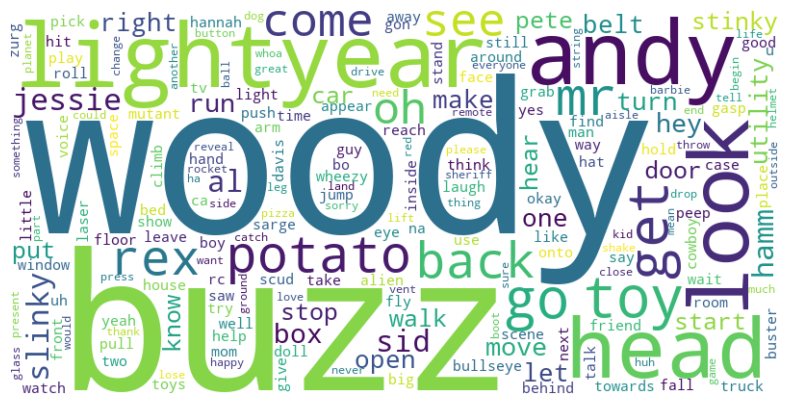

In [32]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# We display our wordcloud with aid of matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

woody: 1166 times
buzz: 932 times
lightyear: 318 times
andy: 316 times
head: 276 times
look: 275 times
toy: 269 times
get: 259 times
go: 247 times
mr: 224 times


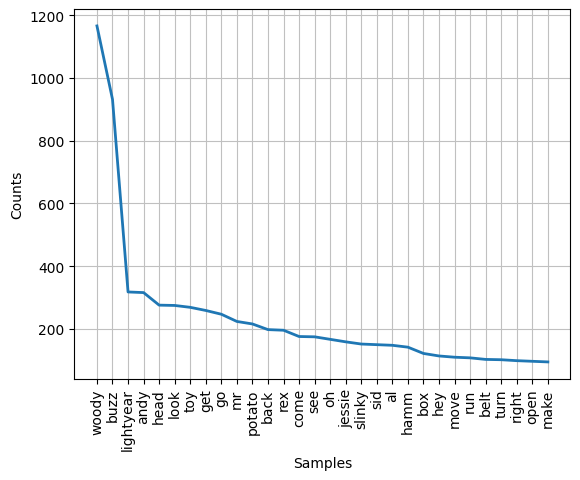

In [33]:
# We get the 10 most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# We plot the frequency for the 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

### Collocations

#### Bigrams

In [34]:
bigram_finder = BigramCollocationFinder.from_words(lemmatized_tokens)
# We score brigrams by their frequency
#The score divides the count of the bigrams divided by the total amount of bigrams.
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
for bigram, score in bigram_scores[:10]:
    print(f"{bigram}: {score}")

('buzz', 'lightyear'): 0.013892552536709752
('potato', 'head'): 0.00932032005627363
('mr', 'potato'): 0.008572935900817726
('utility', 'belt'): 0.004044667194231953
('belt', 'buzz'): 0.003956739646531258
('stinky', 'pete'): 0.0036050294557284797
('woody', 'buzz'): 0.0030335003956739647
('bo', 'peep'): 0.0021542249186670185
('andy', 'mom'): 0.0019344060494152818
('woody', 'woody'): 0.0018464785017145871


#### Trigrams

In [35]:
trigram_finder = TrigramCollocationFinder.from_words(lemmatized_tokens)
# We score trigrams by their frequency
trigram_scores = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
# Print the top 10 trigrams
#The score divides the count of the trigrams divided by the total amount of trigrams.
for trigram, score in trigram_scores[:10]:
    print(f"{trigram}: {score}")

('mr', 'potato', 'head'): 0.008572935900817726
('utility', 'belt', 'buzz'): 0.0038688120988305636
('buzz', 'lightyear', 'woody'): 0.00114305812010903
('buzz', 'buzz', 'lightyear'): 0.000835311703156599
('potato', 'head', 'mr'): 0.000703420381605557
('woody', 'voice', 'box'): 0.000703420381605557
('al', 'toy', 'barn'): 0.0006594566077552098
('head', 'mr', 'potato'): 0.0006594566077552098
('wait', 'wait', 'wait'): 0.0006154928339048624
('buzz', 'lightyear', 'buzz'): 0.000571529060054515


---

#### Embeddings

##### Word2vec

Word2Vec is a technique used in natural language processing that employs a neural network model to learn word associations from a large corpus of text, such as the ‘Toy Story’ corpus in our case. It represents each unique word as a vector in a high-dimensional space. The position of these vectors in the space is learned in a way that words with similar meanings are located close to each other. Word2Vec can indicate the level of semantic similarity between words based on the cosine similarity of their vectors.

In [36]:
from gensim.models import Word2Vec
import nltk

# We first set our data to be our previous lemmatized tokens
data = [lemmatized_tokens]

# We set the parameters
feature_size = 100    
window_context = 30                                                                                       
min_word_count = 1                         
sample = 1e-3         

w2v_model = Word2Vec(data, vector_size=feature_size, 
                     window=window_context, min_count=min_word_count,
                     sample=sample, epochs=50)

# Looking at top 10 similar words based on word2vec model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=10)]
                  for search_term in ['woody', 'andy', 'rex', 'potato', 'slinky', 'hamm', 'buzz']}
print(similar_words)

{'woody': ['watch', 'away', 'terminate', 'idea', 'weakly', 'revenge', 'break', 'something', 'lose', 'much'], 'andy': ['conversation', 'davis', 'leavin', 'scatter', 'whoo', 'heard', 'honey', 'convince', 'dr', 'empty'], 'rex': ['irritate', 'travel', 'mr', 'lizard', 'ah', 'styrofoam', 'slinky', 'nothin', 'cake', 'ice'], 'potato': ['mr', 'head', 'hamm', 'quit', 'effect', 'bustle', 'slot', 'goin', 'suppose', 'lizard'], 'slinky': ['slink', 'mouth', 'rex', 'paw', 'meeting', 'news', 'stretch', 'effect', 'ai', 'staff'], 'hamm': ['mr', 'bumps', 'goin', 'potato', 'slot', 'head', 'uncultured', 'picasso', 'swine', 'hockey'], 'buzz': ['lightyear', 'answer', 'pin', 'local', 'kill', 'spaceman', 'eyeball', 'command', 'suck', 'star']}


Heatmap of 10 most similar words to 'woody', this displays their similarity inbetween them.

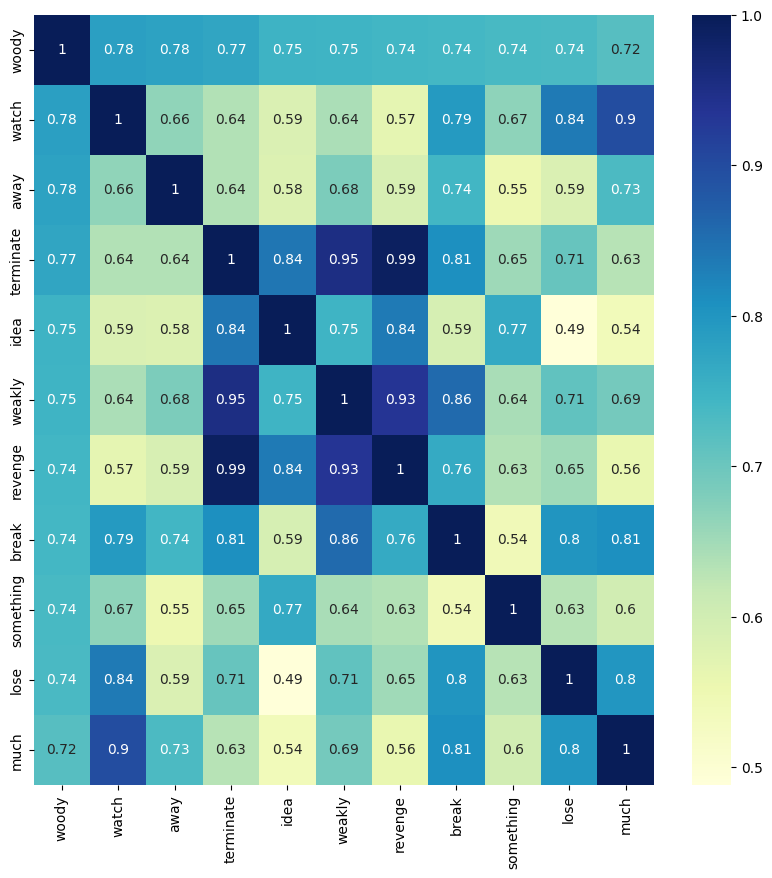

In [37]:
#Heatmap with percentage of similarity inbetween them for 10 closest words to Woody.

words = sum([[k] + v for k, v in similar_words.items()], [])[:11]

# We obtain our similarity scores
similarity_scores = [[w2v_model.wv.similarity(w1, w2) for w1 in words] for w2 in words]

df = pd.DataFrame(similarity_scores, columns=words, index=words)

plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.show()

Heatmap of 10 most similar words to 'andy', this displays their similarity inbetween them.

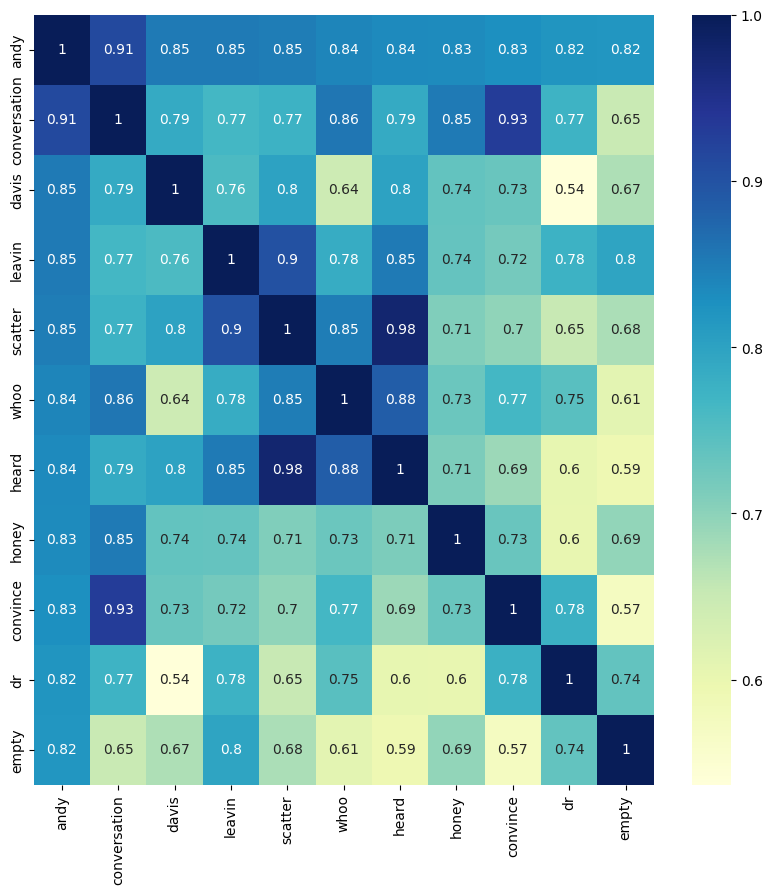

In [38]:
#Heatmap with percentage of similarity inbetween them for 10 closest words to Andy.

words = sum([[k] + v for k, v in similar_words.items()], [])[11:22]

# We obtain our similarity scores
similarity_scores = [[w2v_model.wv.similarity(w1, w2) for w1 in words] for w2 in words]

df = pd.DataFrame(similarity_scores, columns=words, index=words)

plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.show()

Heatmap of 10 most similar words to 'rex', this displays their similarity inbetween them.

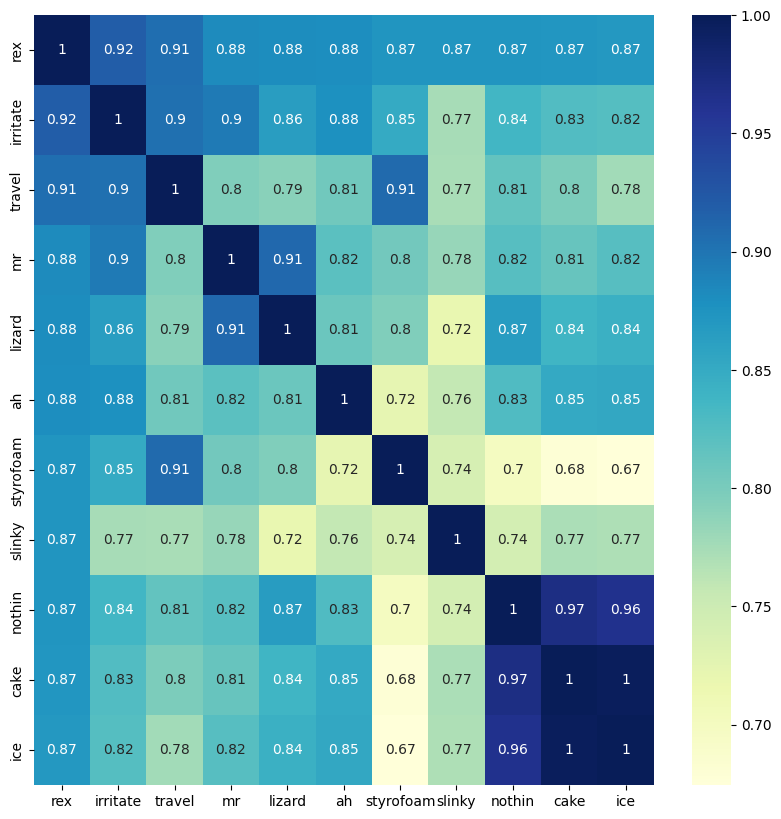

In [39]:
#Heatmap with percentage of similarity inbetween them for 10 closest words to Rex.

words = sum([[k] + v for k, v in similar_words.items()], [])[22:33]

# We obtain our similarity scores
similarity_scores = [[w2v_model.wv.similarity(w1, w2) for w1 in words] for w2 in words]

df = pd.DataFrame(similarity_scores, columns=words, index=words)

plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.show()

TSNE Plot

We are going to use t-SNE, which is a statistical method specifically designed for visualizing high-dimensional data. It works by assigning each data point a location in a two or three-dimensional map. The distance between points in this map can be interpreted as their semantic similarity. For example mr, potato and head. This makes sense as there is a character constantly called like this in toy story movies. However this semantic similarity does not mean it has context and it can often group them without them making sense.

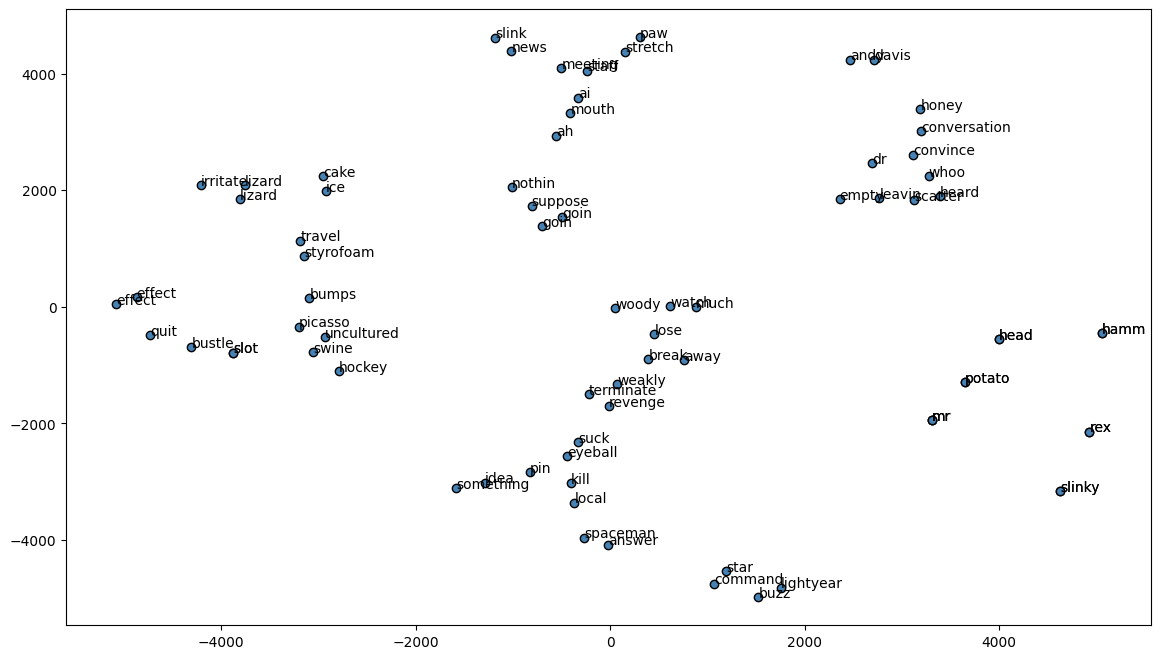

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# We get all unique words from our previously declared 'similar_words' 
words = sum([[k] + v for k, v in similar_words.items()], [])

# Generating a vector
word_vectors = np.array([w2v_model.wv[word] for word in words])

# WE use t-SNE to reduce dimensionality and be able to plot it.
tsne = TSNE(n_components=2, random_state=42, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)

# We then plot our t-SNE results
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(words, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

#### Clustering

K Means

K-means is an unsupervised learning algorithm that groups similar observations together to discover underlying patterns.It also can be used to cluster similar words. This words should have similar vectors and should end up in the same cluster. However looking at our plot it seems that K-means may not be performing optimally as our clusters do not seem to have a spherical form. Due to this, we will consider trying another algorithm that does not make this assumption.

In [41]:
from sklearn.cluster import KMeans

words = list(set(lemmatized_tokens))

# Get the vector for each word
word_vectors = np.array([w2v_model.wv[word] for word in words])

# We choose the number of clusters
num_clusters = 10

# We perform our k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(word_vectors)

# We get the cluster labels for each word
labels = kmeans.labels_

# Create a DataFrame with words and their cluster labels
df = pd.DataFrame({'word': words, 'label': labels})

# We then print the words in each cluster
for i in range(num_clusters):

    print(f"Cluster {i + 1}:")
    print(df[df['label'] == i]['word'].values)

Cluster 1:
['bonnie' 'hill' 'zone' 'richmond' 'movie' 'bit' 'accelerator' 'lawyer'
 'delay' 'zip' 'squeaky' 'feel' 'choose' 'gulp' 'groan' 'chomp' 'bubble'
 'whole' 'unit' 'john' 'store' 'checkerboard' 'kill' 'dynamite' 'fade'
 'randy' 'dot' 'upward' 'fossil' 'secure' 'forget' 'park' 'fix' 'punch'
 'almost' 'yuk' 'silly' 'straight' 'stare' 'story' 'karate' 'model' 'race'
 'dive' 'utility' 'left' 'struggle' 'yet' 'direction' 'count' 'unaware'
 'tall' 'idiot' 'lasseter' 'survey' 'area' 'curious' 'cgi' 'report'
 'responsible' 'copy' 'small' 'moment' 'shape' 'description' 'eight'
 'manage' 'water' 'collar' 'ouch' 'chair' 'remember' 'andrew' 'joss'
 'lady' 'tug' 'confirm' 'camera' 'lock' 'chirp' 'seat' 'podium' 'seven'
 'game' 'screenplay' 'attendant' 'steer' 'carl' 'unstable' 'hong' 'bay'
 'intelligent' 'sky' 'weakness' 'singapore' 'smolder' 'collide'
 'furiously' 'remove' 'cargo' 'invasion' 'yell' 'feature' 'cool' 'brain'
 'spaceman' 'happenin' 'speak' 'family' 'adverse' 'happily' 'look'


c:\Users\icono\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


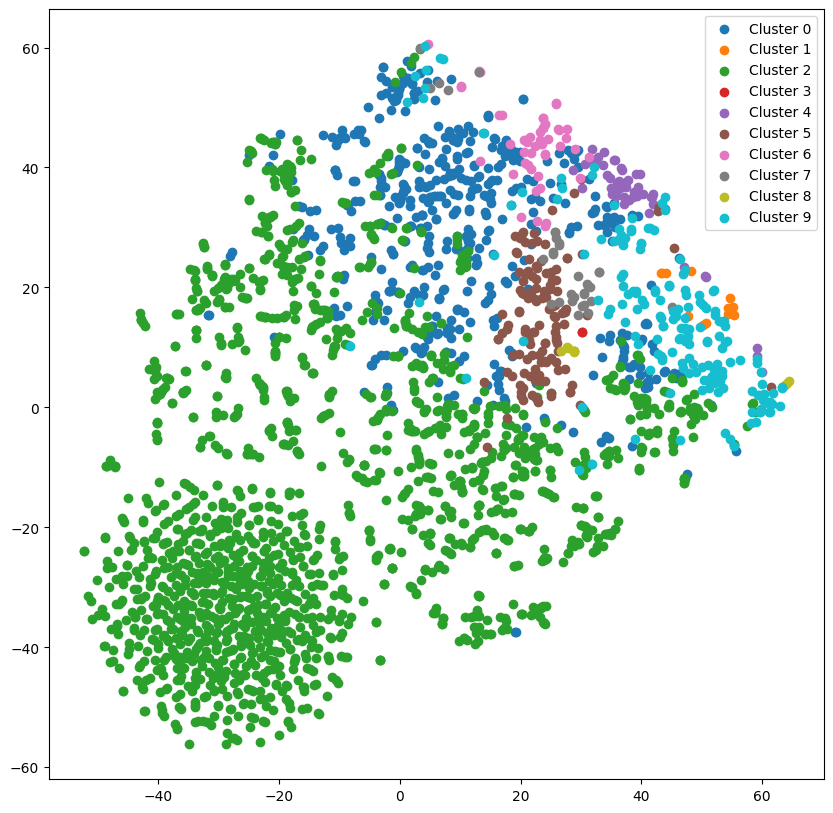

In [42]:
from sklearn.manifold import TSNE

# Use t-SNE to reduce dimensionality to 2
tsne_db = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne_db.fit_transform(word_vectors)

# Create a DataFrame with words, their 2D coordinates, and their cluster labels
df = pd.DataFrame({'word': words, 'x': word_vectors_2d[:, 0], 'y': word_vectors_2d[:, 1], 'label': labels})

# Plot each cluster
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    cluster_df = df[df['label'] == i]
    plt.scatter(cluster_df['x'], cluster_df['y'], label=f'Cluster {i}')

plt.legend()
plt.show()


Latent Dirichlet Allocation (LDA)

It is a model that identifies underlying topics in a text. It operates under the assumption that a given text is composed of a mixture of various topics. Each of these topics is characterized by a collection of words, with the relevance of each word determined by its probability distribution which is also known as weight.

In [54]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Create a dictionary representation of your documents
dictionary = corpora.Dictionary([lemmatized_tokens])

# Convert your documents to vectors
corpus = [dictionary.doc2bow(text) for text in [lemmatized_tokens]]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)
print('The following topics are shown with their words and corresponding weight')
# Print the topics
# Print the topics with word and weight
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx + 1}")
    
    # Split the string into word-weight pairs
    word_weight_pairs = topic.split(" + ")
    
    for pair in word_weight_pairs:
        # Split each pair into word and weight
        weight, word = pair.split("*")
        
        # Remove the quotes around the word
        word = word.replace('"', '')
        
        print(f"{word}: {weight}")
    
    print("\n")

The following topics are shown with their words and corresponding weight
Topic: 1
woody: 0.050
buzz: 0.027
andy: 0.013
head: 0.011
look: 0.011
potato: 0.010
toy: 0.010
go: 0.009
get: 0.009
lightyear: 0.008


Topic: 2
woody: 0.049
buzz: 0.039
lightyear: 0.017
andy: 0.013
head: 0.012
toy: 0.011
get: 0.011
go: 0.010
look: 0.010
potato: 0.008


Topic: 3
woody: 0.044
buzz: 0.041
toy: 0.012
andy: 0.011
look: 0.011
head: 0.011
go: 0.010
mr: 0.010
lightyear: 0.009
back: 0.009


Topic: 4
woody: 0.040
buzz: 0.021
look: 0.012
andy: 0.011
head: 0.011
get: 0.009
toy: 0.009
go: 0.009
mr: 0.008
potato: 0.008


Topic: 5
buzz: 0.043
woody: 0.041
lightyear: 0.012
andy: 0.012
mr: 0.012
look: 0.011
get: 0.011
toy: 0.010
head: 0.009
go: 0.009




In the following plots, we display our topics with their corresponding weights. As you can tell, the topics look to be somewhat interconnected. This do make sense, as the focus of 'Toy Story' is rescuing Buzz Lightyear, and the focus of 'Toy Story 2'  is rescuing Woody. But, this can also mean our corpus is not big enough to display the total amount of topics we are asking and probably a better approach would be to lessen the amount of topics.

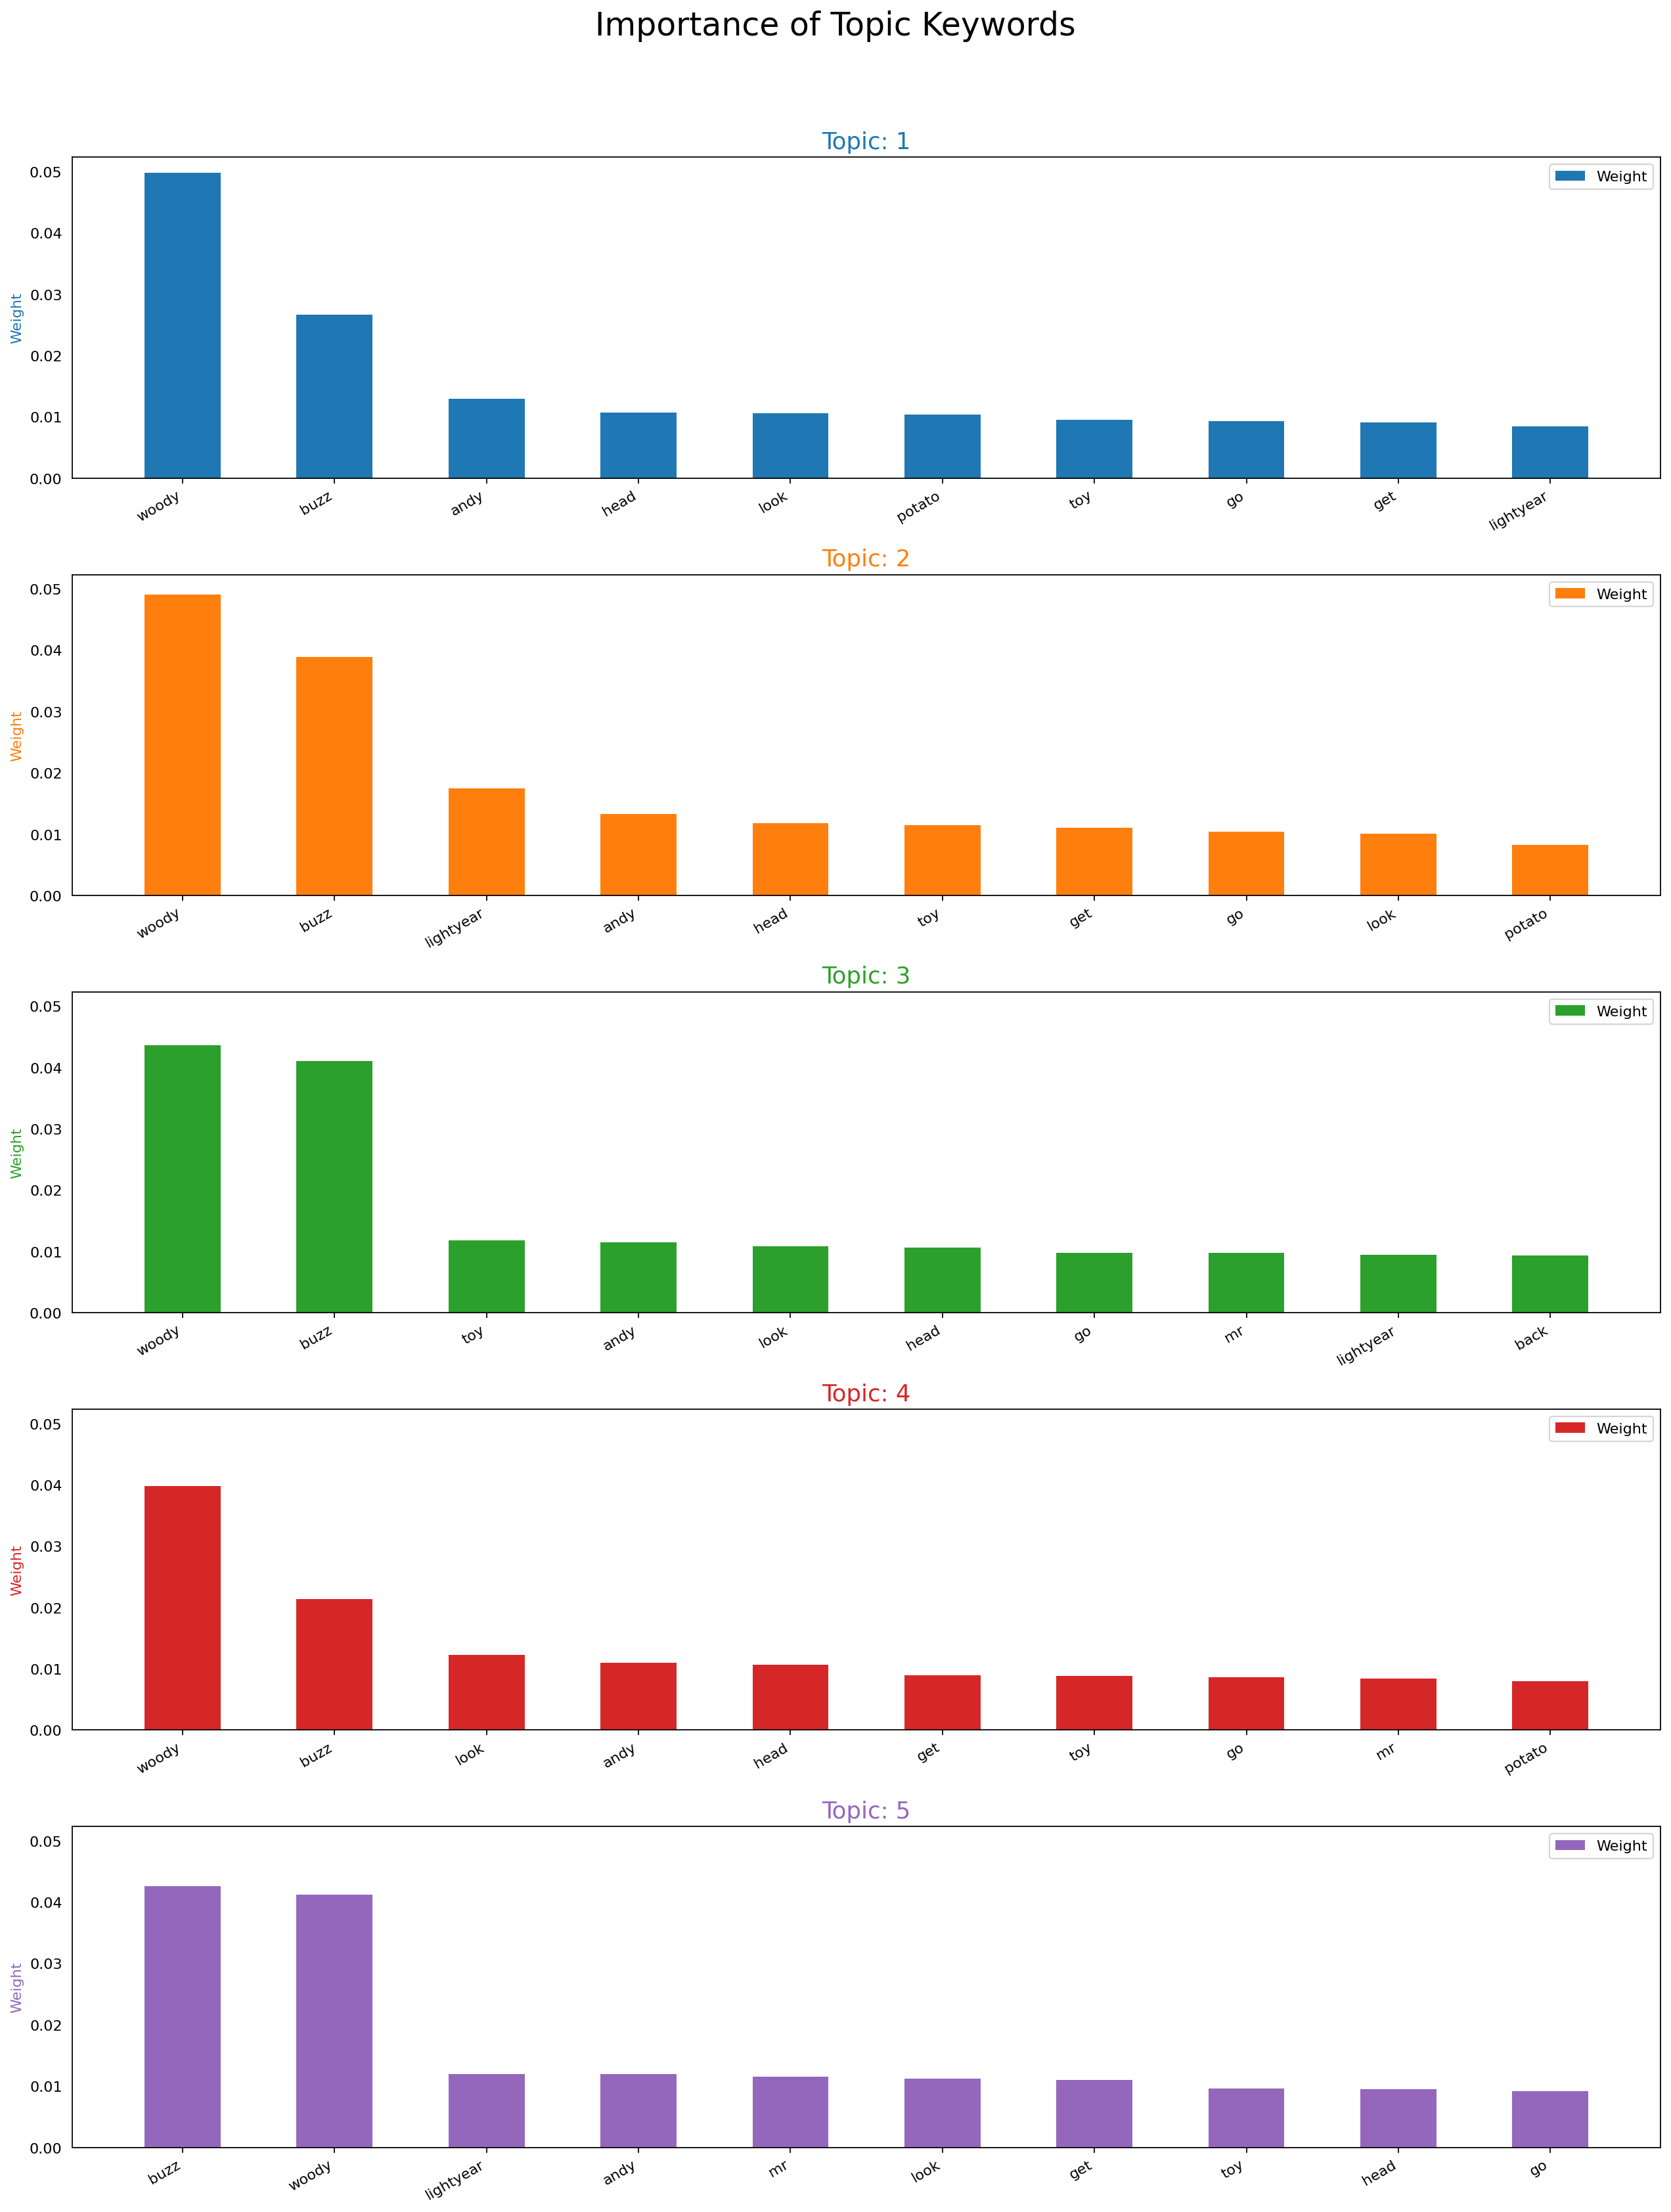

In [55]:
from collections import Counter
import matplotlib.colors as mcolors

# Get the topics from your LDA model
topics = lda_model.show_topics(formatted=False)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight])

# Create a DataFrame with the words, their topic, and importance
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

# Plot Weights of Topic Keywords
fig, axes = plt.subplots(5, 1, figsize=(16,20), sharey=True, dpi=160)
axes = axes.flatten()
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes):
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, label='Weight')
    ax.set_ylabel('Weight', color=cols[i])
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    
    words = df.loc[df.topic_id==i, 'word']
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(words, rotation=30, horizontalalignment= 'right')
    
    ax.legend(loc='upper right')

fig.tight_layout(w_pad=2) 
fig.suptitle('Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

---

#### Zero shot Model

Facebook/Bart-large-mnli

This is a variant of the BART model which has been trained on the MultiNLI(MNLI) dataset.MNLI covers a range of genres of spoken and written text and supports a distinctive cross-genre generalization evalulation.
This model, can be used for zero shot classification tasks which is the ability to recognize objects it has never seen during training.
The specific authors who fine tuned this variant of the model are not explicitly known. However we do know who introduced BART model:
* Mike Lewis
* Yinhan Liu
* Naman Goyal0
* Marjan Ghazvininejad
* Abdelrahman Mohamed
* Omer Levy
* Veselin Stoyanov
* Luke Zettlemoyer

How to use it?

* First, we need to import the neccesary libraries:
`from transformers import pipeline, AutoTokenizer`
* We then define our candidate labels, in our case we define them in label_genre.
* We load a tokenizer for our model. A default tokenizer is automatically created, but it's considered good practice to load the tokenizer explicitly.
* We initialize our zero-shot classification pipeline and save it in the `classifier_genre` variable.
* We use the classifier_genre pipeline to classify the input text and obtain the classification results, which are returned as a dictionary with labels and scores.
* Finally, we can use the returned results for further processing or analysis, such as printing the labels and scores.

In [45]:
from transformers import pipeline, AutoTokenizer

# Define your candidate labels
label_genre = ["Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", 
          "Drama", "Family", "Fantasy", "Musical", 
          "Mystery", "Romance"]

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")

# Initialize the zero-shot classification pipeline with the tokenizer
classifier_genre = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", tokenizer=tokenizer)

# Get the classification results
result = classifier_genre(raw_text, label_genre)

# Extract labels and scores
label_genre = result['labels']

scores_genre = result['scores']

# Print each label and its corresponding score
for i in range(len(label_genre)):
    print(f"{label_genre[i]}: {scores_genre[i]}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


Documentary: 0.1297917366027832
Adventure: 0.1186651960015297
Action: 0.10238637775182724
Animation: 0.09551071375608444
Musical: 0.0938049852848053
Family: 0.08813349157571793
Fantasy: 0.07879766076803207
Crime: 0.06651578843593597
Romance: 0.06378383189439774
Mystery: 0.06344300508499146
Comedy: 0.05109057202935219
Drama: 0.04807653650641441


Movie Genre Classification Results

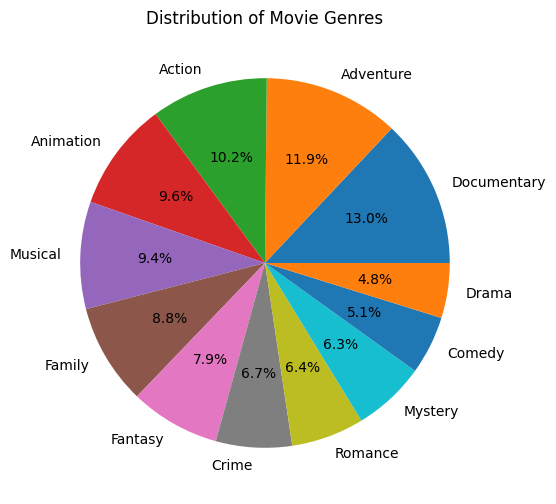

In [46]:
# Create a pie chart of the scores
plt.figure(figsize=(10,6))  # Increase figure size for better visibility
plt.pie(scores_genre, labels=label_genre, autopct='%1.1f%%')  # Plot the data

plt.title('Distribution of Movie Genres')  # Title of the plot

plt.show()


In [47]:
sentiment_label = ["Happy", "Sad", "Angry", "Surprise","Love", "Hate"]

# Initialize the zero-shot classification pipeline with the tokenizer
sentiment_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", tokenizer=tokenizer)

# Get the classification results
result_sentiment = sentiment_classifier(raw_text, sentiment_label)
print('Sentiment Analysis')
# Extract labels and scores
sentiment_label = result_sentiment['labels']
sentiment_score = result_sentiment['scores']
# Print each label and its corresponding score
for i in range(len(sentiment_label)):
    print(f"{sentiment_label[i]}: {sentiment_score[i]}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


Sentiment Analysis
Love: 0.2289440929889679
Surprise: 0.22860850393772125
Happy: 0.19411113858222961
Sad: 0.14685752987861633
Angry: 0.14509879052639008
Hate: 0.05637997016310692


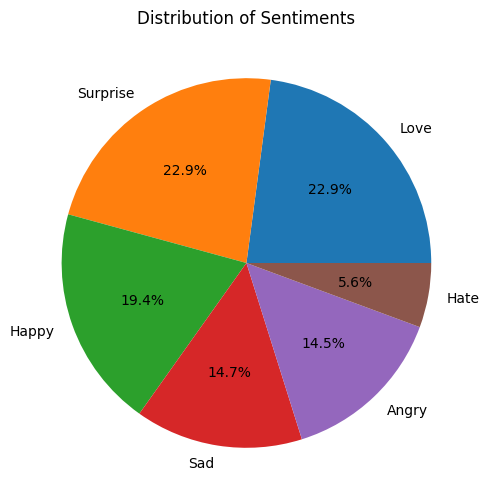

In [48]:
# Create a pie chart of the scores
plt.figure(figsize=(10,6))  # Increase figure size for better visibility
plt.pie(sentiment_score, labels=sentiment_label, autopct='%1.1f%%')  # Plot the data

plt.title('Distribution of Sentiments')  # Title of the plot

plt.show()

Sentiment Classification Results

Character trait analysis

In [49]:
trait_label = ["Leadership", "Friendship", "Loyalty", "Bravery","Jealousy"]

# Initialize the zero-shot classification pipeline with the tokenizer
trait_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", tokenizer=tokenizer)

# Get the classification results
result_trait = trait_classifier(raw_text, trait_label)
print(f'Character traits')
# Extract labels and scores
trait_label = result_trait['labels']
trait_score = result_trait['scores']
# Print each label and its corresponding score
for i in range(len(trait_label)):
    print(f"{trait_label[i]}: {trait_score[i]}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


Character traits
Loyalty: 0.26037171483039856
Jealousy: 0.20620709657669067
Friendship: 0.19376100599765778
Leadership: 0.17785850167274475
Bravery: 0.1618017852306366


Trait Classification Results

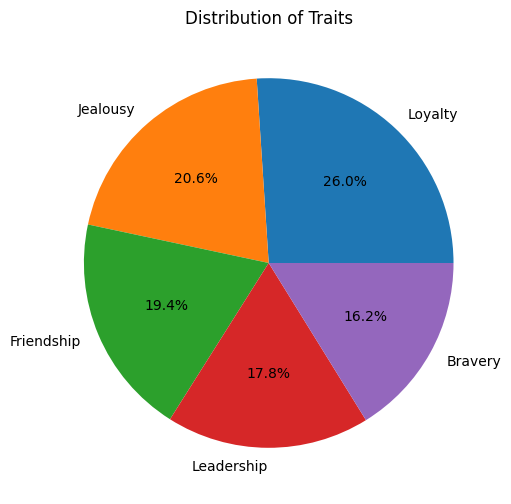

In [50]:
# Create a pie chart of the scores
plt.figure(figsize=(10,6))  # Increase figure size for better visibility
plt.pie(trait_score, labels=trait_label, autopct='%1.1f%%')  # Plot the data

plt.title('Distribution of Traits')  # Title of the plot

plt.show()

Relationship between Zero-Shot Predictions and K-Means Clustering

The relationship between these two techniques lies in their application for understanding and categorizing text data. Zero-shot predictions focus on classifying individual text samples into predefined categories, K-Means clustering can be applied to group text data into clusters based on  similarities in their representations (Word2Vec vectors in our case). These clusters can be used for various purposes, including topic modeling, data exploration, and discovering  patterns in our data.Both techniques serve the  goal of making sense and organizing information. One does it through supervised classification and the other through unsupervised clustering.